In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

### 1. Data Exploration and Preprocessing: 
Understand your data. Handle missing values, encode categorical variables, and normalize numerical variables.

In [2]:
df = pd.read_csv("data/train.csv")

print(df.shape)
df.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
#check null values and print only which have null values
print(df.isnull().sum()[df.isnull().sum() > 0])

#print % of missing values in each column
print(df.isnull().mean()[df.isnull().sum() > 0] * 100)



LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64
LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64


In [4]:
# dropping cols with missing values > 40%
cols_to_drop = df.columns[df.isnull().mean() > 0.4]
df = df.drop(cols_to_drop, axis=1)
#print % of missing values in each column
print(df.isnull().mean()[df.isnull().sum() > 0] * 100)

LotFrontage     17.739726
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
dtype: float64


In [5]:
cols_to_impute = df.columns[df.isnull().mean() > 0]

#check col types
print(df[cols_to_impute].dtypes)

#impute float cols with mean and object cols with mode
for col in cols_to_impute:
    if df[col].dtype == 'float64':
        df[col] = df[col].fillna(df[col].mean())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])

print(df.isnull().mean()[df.isnull().sum() > 0] * 100)



LotFrontage     float64
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
dtype: object
Series([], dtype: float64)


In [6]:
#print all col names
print(df.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

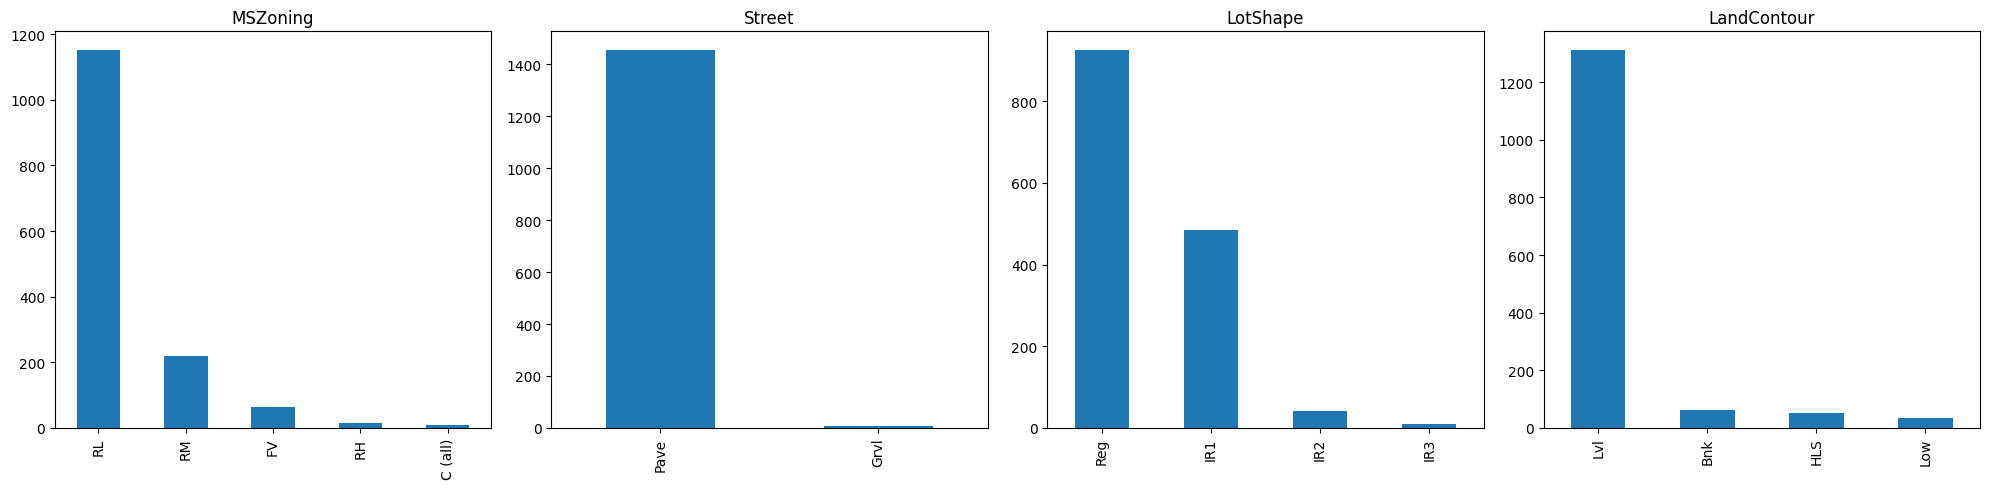

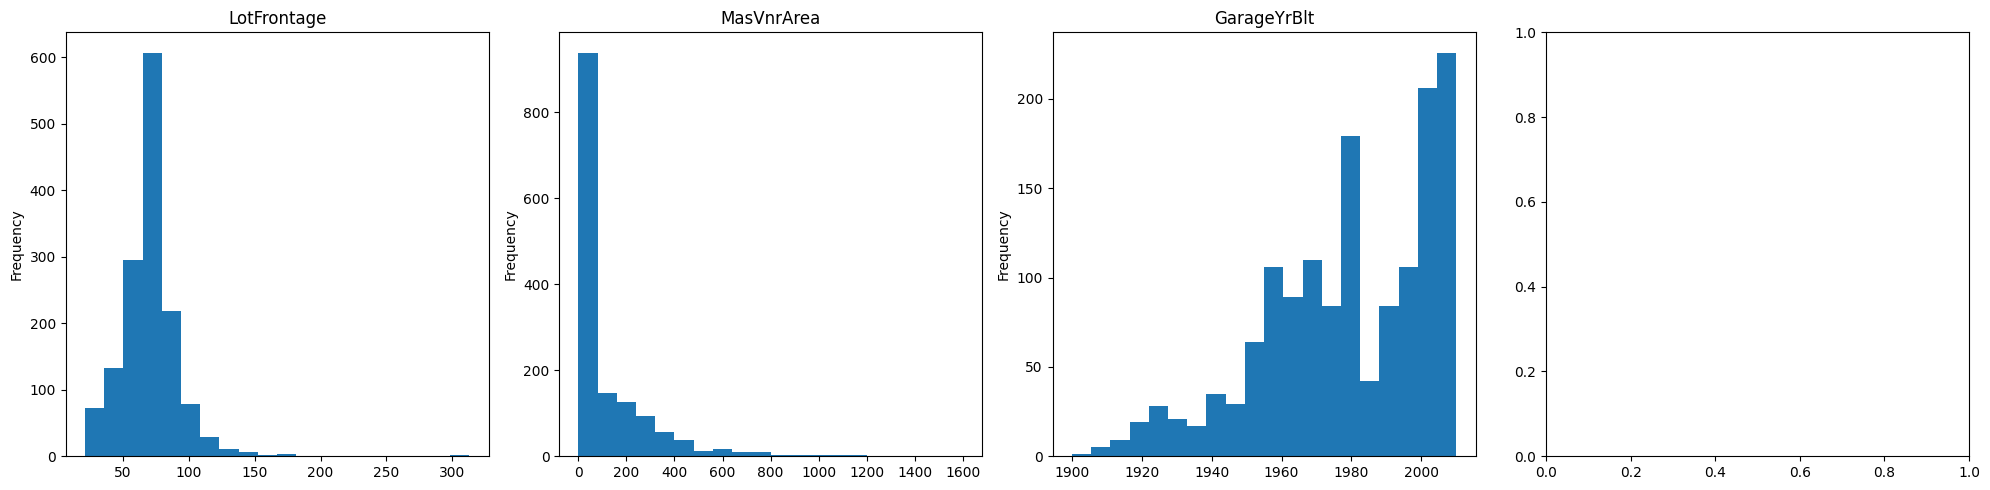

In [66]:
#count plots
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20, 5)) # Adjust figsize accordingly
axs = axs.flatten() # Flatten in case of a single row to ease indexing
object_cols = [col for col in df.columns if df[col].dtype == 'object']
for i, col in enumerate(object_cols):
    if i < 4: # Ensure we only plot the first 4 object columns
        df[col].value_counts().plot.bar(ax=axs[i])
        axs[i].set_title(col)
plt.tight_layout()
plt.show()

#histograms
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20, 5)) # Adjust figsize accordingly
axs = axs.flatten() # Flatten in case of a single row to ease indexing
float_cols = [col for col in df.columns if df[col].dtype == 'float64']
for i, col in enumerate(float_cols):
    if i < 4: # Ensure we only plot the first 4 float columns
        df[col].plot.hist(ax=axs[i], bins=20)
        axs[i].set_title(col)
plt.tight_layout()
plt.show()


You will create a new variable 'House Category' based on 'House Style', 'Bldg Type', 'Year Built', and 'Year Remod/Add' for the classification task.

In [8]:
cols_for_category = ["HouseStyle","BldgType","YearBuilt","YearRemodAdd"]

#data types of cols
print(df[cols_for_category].dtypes)

#display unique values in each col
for col in cols_for_category:
    print(col)
    print(df[col].unique())



HouseStyle      object
BldgType        object
YearBuilt        int64
YearRemodAdd     int64
dtype: object
HouseStyle
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
BldgType
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
YearBuilt
[2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd
[2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 195

## Creating Categories from 
- House Style
- Bldg Type
- Year Built
- Year Remod/Add

In [9]:
# Define category mapping
def categorize(row):
    if row['YearBuilt'] >= 1990 or row['YearRemodAdd'] >= 1990:
        era = 'Modern'
    elif row['YearBuilt'] < 1950 and row['YearRemodAdd'] < 1975:
        era = 'Historic'
    else:
        era = 'Mid-Century'

    if 'Twnhs' in row['BldgType']:
        type_ = 'Townhouse'
    elif row['BldgType'] in ['1Fam', '2fmCon']:
        type_ = 'Family Home'
    else:
        type_ = 'Multi-Unit'

    if row['HouseStyle'] in ['1Story', '1.5Fin', '2Story']:
        style_ = '1Story'
    elif row['HouseStyle'] in ['2Story', '2.5Fin', '2.5Unf']:
        style_ = '2Story'
    else:
        style_ = 'Other'

    return f"{era} {type_} {style_}"

# Apply categorization
df['house_category'] = df.apply(categorize, axis=1)


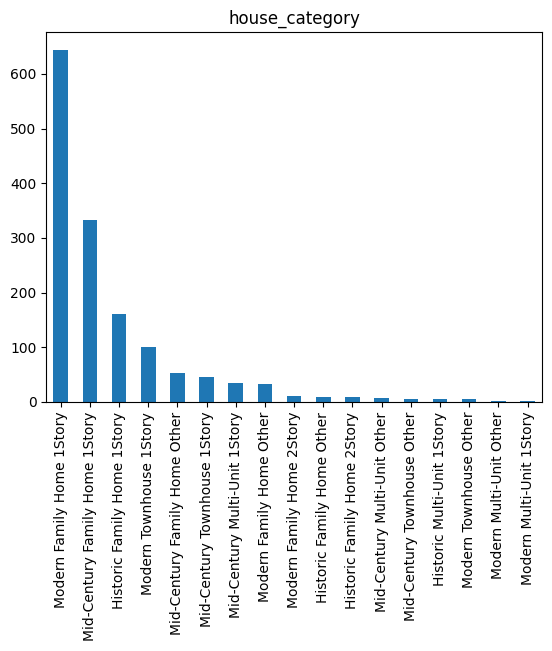

In [10]:
#plot house category
plt.figure()
df['house_category'].value_counts().plot.bar()
plt.title('house_category')
plt.show()



In [11]:
#print all cols
print(df.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

In [12]:
#drop ID col
df = df.drop("Id", axis=1)


In [13]:
#print cols datatypes
for col in df.columns:
    print(col, df[col].dtype)

MSSubClass int64
MSZoning object
LotFrontage float64
LotArea int64
Street object
LotShape object
LandContour object
Utilities object
LotConfig object
LandSlope object
Neighborhood object
Condition1 object
Condition2 object
BldgType object
HouseStyle object
OverallQual int64
OverallCond int64
YearBuilt int64
YearRemodAdd int64
RoofStyle object
RoofMatl object
Exterior1st object
Exterior2nd object
MasVnrType object
MasVnrArea float64
ExterQual object
ExterCond object
Foundation object
BsmtQual object
BsmtCond object
BsmtExposure object
BsmtFinType1 object
BsmtFinSF1 int64
BsmtFinType2 object
BsmtFinSF2 int64
BsmtUnfSF int64
TotalBsmtSF int64
Heating object
HeatingQC object
CentralAir object
Electrical object
1stFlrSF int64
2ndFlrSF int64
LowQualFinSF int64
GrLivArea int64
BsmtFullBath int64
BsmtHalfBath int64
FullBath int64
HalfBath int64
BedroomAbvGr int64
KitchenAbvGr int64
KitchenQual object
TotRmsAbvGrd int64
Functional object
Fireplaces int64
GarageType object
GarageYrBlt float64
Ga

/var/folders/1p/q_9hhzqs0yddpgkxqm_hvtbc0000gn/T/ipykernel_67387/161442637.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


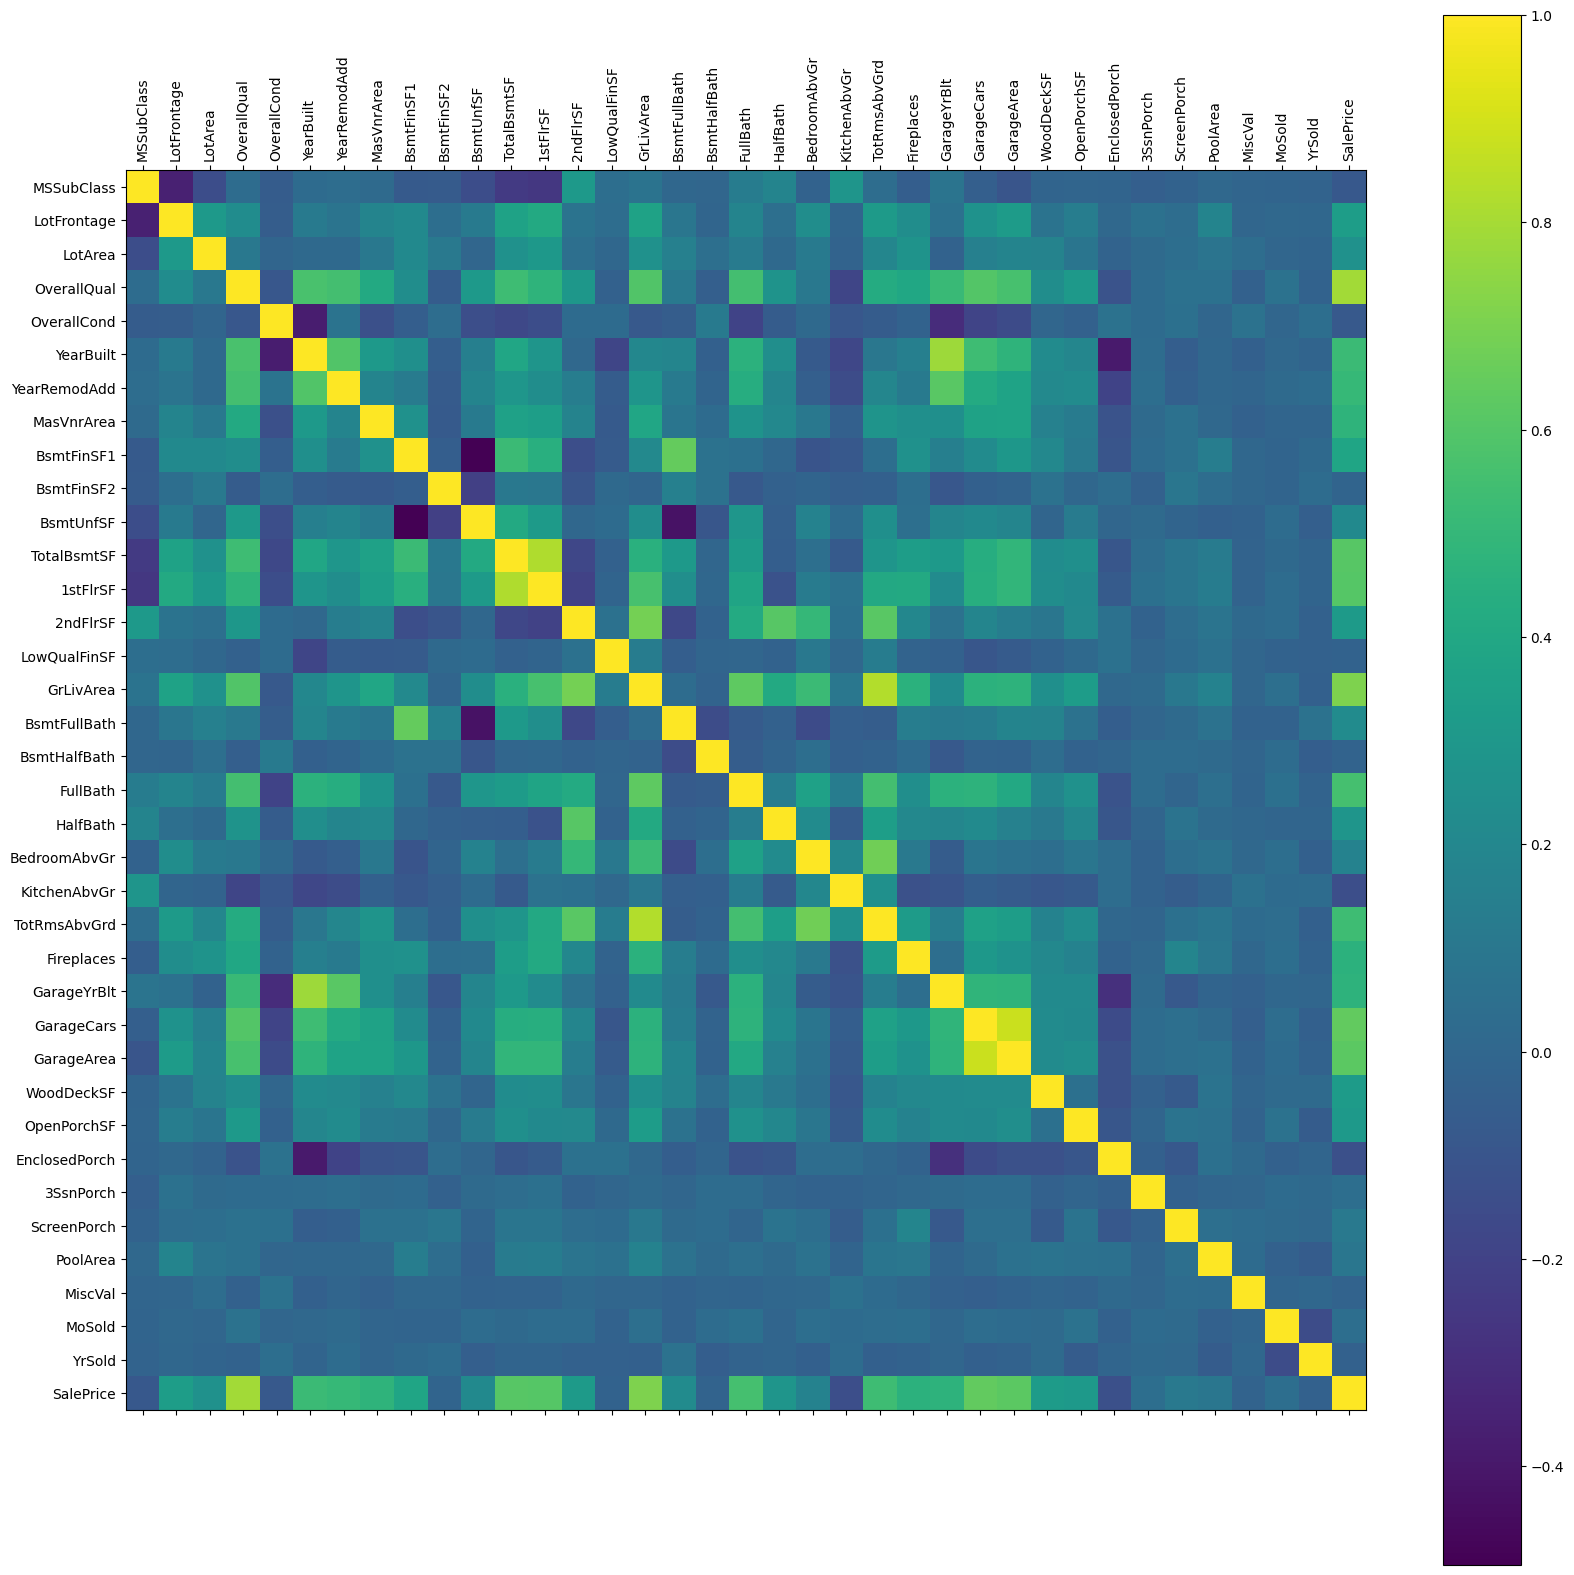

In [55]:
#correlation matrix
corr = df.corr()
plt.figure(figsize=(20,20))
plt.matshow(corr, fignum=1)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()
plt.show()





Separate the input features (X) from the target variables (Y):


In [14]:
X = df.drop(['SalePrice', 'house_category'], axis=1)
y_price = df['SalePrice']
y_category = df['house_category']

In [15]:
#y_category datatype
print(y_price)



0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64


Perform any necessary data preprocessing, such as handling missing values, encoding categorical variables, and scaling numerical features. You can use techniques like imputation, one-hot encoding, and normalization/standardization.

0    10
1     4
2    10
3     0
4    10
5    10
6    10
7     4
8     0
9     2
dtype: int8
int8


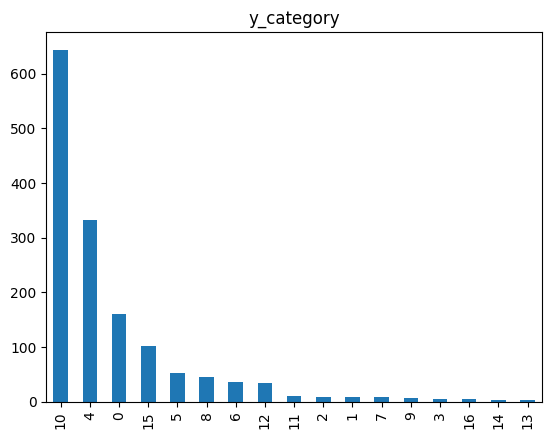

In [16]:
#integer encoding y_category
y_category = y_category.astype('category')
y_category = y_category.cat.codes

#print head
print(y_category.head(10))

#y_category datatype
print(y_category.dtype)

#plot y_category value counts
plt.figure()
y_category.value_counts().plot.bar()
plt.title("y_category")
plt.show()

In [17]:
#one hot encoding for X
X = pd.get_dummies(X, drop_first=True)
#print cols datatypes
print(X.dtypes.value_counts())
print("-----------------\n after conversion\n-----------------")
#convert to float64
for col in X.columns:
    X[col] = X[col].astype('float64')

print(X.dtypes.value_counts())



uint8      196
int64       33
float64      3
dtype: int64
-----------------
 after conversion
-----------------
float64    232
dtype: int64


In [18]:
X.shape

(1460, 232)

Split the data into training and testing sets:


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_price_train, y_price_test, y_category_train, y_category_test = train_test_split(
    X, y_price, y_category, test_size=0.2, random_state=42
)

Further split the training data into training and validation sets:


In [20]:
X_train, X_val, y_price_train, y_price_val, y_category_train, y_category_val = train_test_split(
    X_train, y_price_train, y_category_train, test_size=0.2, random_state=42
)

Create PyTorch datasets and data loaders for training, validation, and testing:

In [21]:
import torch
from torch.utils.data import TensorDataset, DataLoader

# Create PyTorch datasets
train_dataset = TensorDataset(torch.tensor(X_train.values, dtype=torch.float32),
                              torch.tensor(y_price_train.values, dtype=torch.float32),
                              torch.tensor(y_category_train.values, dtype=torch.long))

val_dataset = TensorDataset(torch.tensor(X_val.values, dtype=torch.float32),
                            torch.tensor(y_price_val.values, dtype=torch.float32),
                            torch.tensor(y_category_val.values, dtype=torch.long))

test_dataset = TensorDataset(torch.tensor(X_test.values, dtype=torch.float32),
                             torch.tensor(y_price_test.values, dtype=torch.float32),
                             torch.tensor(y_category_test.values, dtype=torch.long))

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)



In [22]:
input_size = X_train.shape[1]
num_classes = len(y_category.unique())
print(input_size, num_classes)

232 17


# Hyperparameter Tuning Using Optuna

In [41]:
import optuna
import torch.nn as nn
import pytorch_lightning as pl
from pytorch_lightning.loggers import TensorBoardLogger
from pytorch_lightning import Callback

class HousingModel(pl.LightningModule):
    def __init__(self, trial: optuna.trial.Trial, input_size, num_classes):
        super().__init__()
        self.save_hyperparameters()

        # Hyperparameters
        hidden_size1 = trial.suggest_int('hidden_size1', 64, 512)
        hidden_size2 = trial.suggest_int('hidden_size2', 64, 512)
        lr = trial.suggest_loguniform('lr', 1e-5, 1e-1)
        optimizer_type = trial.suggest_categorical('optimizer_type', ['adam', 'sgd', 'rmsprop'])
        self.w_loss = trial.suggest_uniform('w_loss', 0.01, 0.1)
        self.w_acc = 1 - self.w_loss

        # Model architecture
        self.hidden_layer1 = nn.Linear(input_size, hidden_size1)
        self.batch_norm1 = nn.BatchNorm1d(hidden_size1)
        self.hidden_layer2 = nn.Linear(hidden_size1, hidden_size2)
        self.batch_norm2 = nn.BatchNorm1d(hidden_size2)
        self.price_layer = nn.Linear(hidden_size2, 1)
        self.category_layer = nn.Linear(hidden_size2, num_classes)

        # Initialize weights
        self._init_weights()

        # Optimizer type
        self.optimizer_type = optimizer_type
        self.lr = lr

    def _init_weights(self):
        # Kaiming (He) initialization for layers with ReLU activation
        nn.init.kaiming_normal_(self.hidden_layer1.weight, mode='fan_out', nonlinearity='relu')
        nn.init.kaiming_normal_(self.hidden_layer2.weight, mode='fan_out', nonlinearity='relu')
        # For the output layers, you might use a simpler initialization since they might not be followed by ReLU
        nn.init.xavier_normal_(self.price_layer.weight)
        nn.init.xavier_normal_(self.category_layer.weight)

        
    def forward(self, x):
        x = self.hidden_layer1(x)
        x = self.batch_norm1(x)  # Apply BatchNorm after first linear layer
        # x = self.layer_norm1(x)  # Apply LayerNorm after BatchNorm
        x = torch.relu(x)
        
        x = self.hidden_layer2(x)
        x = self.batch_norm2(x)  # Apply BatchNorm after second linear layer
        # x = self.layer_norm2(x)  # Apply LayerNorm after BatchNorm
        x = torch.relu(x)
        
        price = self.price_layer(x)
        category = self.category_layer(x)
        return price, category
    
    def training_step(self, batch, batch_idx):
        x, y_price, y_category = batch
        price_pred, category_pred = self(x)
        
        price_loss = nn.MSELoss()(price_pred, y_price.view(-1, 1))
        category_loss = nn.CrossEntropyLoss()(category_pred, y_category)
        
        loss = self.w_loss * price_loss + self.w_acc * category_loss
        self.log('train_loss', loss)
        return loss
    

    
    def validation_step(self, batch, batch_idx):
        x, y_price, y_category = batch
        price_pred, category_pred = self(x)
        
        price_loss = nn.MSELoss()(price_pred, y_price.view(-1, 1))
        category_loss = nn.CrossEntropyLoss()(category_pred, y_category)

        loss = self.w_loss * price_loss + self.w_acc * category_loss

        accuracy = accuracy_score(y_category.cpu().numpy(), category_pred.argmax(dim=1).cpu().numpy(), normalize=True)
        precision = precision_score(y_category.cpu().numpy(), category_pred.argmax(dim=1).cpu().numpy(), average='weighted', zero_division=1)
        recall = recall_score(y_category.cpu().numpy(), category_pred.argmax(dim=1).cpu().numpy(), average='weighted', zero_division=1)
        f1 = f1_score(y_category.cpu().numpy(), category_pred.argmax(dim=1).cpu().numpy(), average='weighted', zero_division=1)

   

        self.log('val_loss', loss)
        self.log('val_accuracy', accuracy)
        self.log('val_precision', precision)
        self.log('val_recall', recall)
        self.log('val_f1', f1)
        self.log('val_price_loss', price_loss)
        self.log('val_category_loss', category_loss)
    
    def test_step(self, batch, batch_idx):
        x, y_price, y_category = batch
        price_pred, category_pred = self(x)
        
        price_loss = nn.MSELoss()(price_pred, y_price.view(-1, 1))
        category_loss = nn.CrossEntropyLoss()(category_pred, y_category)

        loss = self.w_loss * price_loss + self.w_acc * category_loss

        accuracy = accuracy_score(y_category.cpu().numpy(), category_pred.argmax(dim=1).cpu().numpy(), normalize=True)
        precision = precision_score(y_category.cpu().numpy(), category_pred.argmax(dim=1).cpu().numpy(), average='weighted', zero_division=1)
        recall = recall_score(y_category.cpu().numpy(), category_pred.argmax(dim=1).cpu().numpy(), average='weighted', zero_division=1)
        f1 = f1_score(y_category.cpu().numpy(), category_pred.argmax(dim=1).cpu().numpy(), average='weighted', zero_division=1)
        
        self.log('test_loss', loss)
        self.log('test_price_loss', price_loss)
        self.log('test_category_loss', category_loss)
        self.log('test_accuracy', accuracy)
        self.log('test_precision', precision)
        self.log('test_recall', recall)
        self.log('test_f1', f1)

    
    def configure_optimizers(self):
        if self.optimizer_type == 'adam':
            optimizer = torch.optim.Adam(self.parameters(), lr=self.lr)
        elif self.optimizer_type == 'sgd':
            optimizer = torch.optim.SGD(self.parameters(), lr=self.lr, momentum=0.9)
        elif self.optimizer_type == 'rmsprop':
            optimizer = torch.optim.RMSprop(self.parameters(), lr=self.lr)
        else:
            raise ValueError(f"Unsupported optimizer type: {self.optimizer_type}")
        return optimizer



def objective(trial: optuna.trial.Trial):
    # Define the hyperparameter search space
    model = HousingModel(trial, input_size=input_size, num_classes=num_classes)
    
    # Define logger and callbacks if needed
    logger = TensorBoardLogger("tb_logs", name="my_model_optuna")
    
    # Early stopping
    early_stopping = pl.callbacks.EarlyStopping('val_loss', patience=10)
    
    # Trainer
    trainer = pl.Trainer(
        logger=logger,
        callbacks=[early_stopping],
        max_epochs=20,
        enable_progress_bar=False
    )
    
    # Fit the model
    trainer.fit(model, train_loader, val_loader)
    
    # Evaluate and return the objective value
    val_loss = trainer.callback_metrics["val_loss"].item()
    return val_loss

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100, timeout=600)

print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial

print("  Value: ", trial.value)
print("  Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")

[I 2024-04-27 16:53:31,993] A new study created in memory with name: no-name-c24fd20b-92b8-4480-b940-72f520b57843
/var/folders/1p/q_9hhzqs0yddpgkxqm_hvtbc0000gn/T/ipykernel_67387/3364915325.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('lr', 1e-5, 1e-1)
/var/folders/1p/q_9hhzqs0yddpgkxqm_hvtbc0000gn/T/ipykernel_67387/3364915325.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  self.w_loss = trial.suggest_uniform('w_loss', 0.01, 0.1)
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name           | Type        | Params
-------------------------

Number of finished trials:  100
Best trial:
  Value:  69980248.0
  Params: 
    hidden_size1: 152
    hidden_size2: 495
    lr: 0.09933770172211563
    optimizer_type: adam
    w_loss: 0.0528856173253155


# Code with Optimized Hyperparameters


In [44]:
import torch.nn as nn
import pytorch_lightning as pl
from pytorch_lightning.loggers import TensorBoardLogger

class HousingModel(pl.LightningModule):
    def __init__(self, input_size, hidden_size1, hidden_size2, num_classes, lr=0.01, optimizer_type='adam', w_loss=0.07):
        super().__init__()
        self.save_hyperparameters()
        self.optimizer_type = optimizer_type
        self.lr = lr
        self.w_loss = w_loss

        self.hidden_layer1 = nn.Linear(input_size, hidden_size1)
        self.batch_norm1 = nn.BatchNorm1d(hidden_size1)  # BatchNorm for the first hidden layer
        # self.layer_norm1 = nn.LayerNorm(hidden_size1)  # LayerNorm for the first hidden layer
        self.hidden_layer2 = nn.Linear(hidden_size1, hidden_size2)
        self.batch_norm2 = nn.BatchNorm1d(hidden_size2)  # BatchNorm for the second hidden layer
        # self.layer_norm2 = nn.LayerNorm(hidden_size2)  # LayerNorm for the second hidden layer
        self.price_layer = nn.Linear(hidden_size2, 1)  # Regression output
        self.category_layer = nn.Linear(hidden_size2, num_classes)  # Classification output

    
        self.w_acc = 1-self.w_loss

        # Initialize weights
        self._init_weights()

    def _init_weights(self):
        # Kaiming (He) initialization for layers with ReLU activation
        nn.init.kaiming_normal_(self.hidden_layer1.weight, mode='fan_out', nonlinearity='relu')
        nn.init.kaiming_normal_(self.hidden_layer2.weight, mode='fan_out', nonlinearity='relu')
        # For the output layers, you might use a simpler initialization since they might not be followed by ReLU
        nn.init.xavier_normal_(self.price_layer.weight)
        nn.init.xavier_normal_(self.category_layer.weight)

        
    def forward(self, x):
        x = self.hidden_layer1(x)
        x = self.batch_norm1(x)  # Apply BatchNorm after first linear layer
        # x = self.layer_norm1(x)  # Apply LayerNorm after BatchNorm
        x = torch.relu(x)
        
        x = self.hidden_layer2(x)
        x = self.batch_norm2(x)  # Apply BatchNorm after second linear layer
        # x = self.layer_norm2(x)  # Apply LayerNorm after BatchNorm
        x = torch.relu(x)
        
        price = self.price_layer(x)
        category = self.category_layer(x)
        return price, category
    
    def training_step(self, batch, batch_idx):
        x, y_price, y_category = batch
        price_pred, category_pred = self(x)
        
        price_loss = nn.MSELoss()(price_pred, y_price.view(-1, 1))
        category_loss = nn.CrossEntropyLoss()(category_pred, y_category)
        
        loss = self.w_loss * price_loss + self.w_acc * category_loss
        self.log('train_loss', loss)
        return loss
    

    
    def validation_step(self, batch, batch_idx):
        x, y_price, y_category = batch
        price_pred, category_pred = self(x)
        
        price_loss = nn.MSELoss()(price_pred, y_price.view(-1, 1))
        category_loss = nn.CrossEntropyLoss()(category_pred, y_category)

        loss = self.w_loss * price_loss + self.w_acc * category_loss

        accuracy = accuracy_score(y_category.cpu().numpy(), category_pred.argmax(dim=1).cpu().numpy(), normalize=True)
        precision = precision_score(y_category.cpu().numpy(), category_pred.argmax(dim=1).cpu().numpy(), average='weighted', zero_division=1)
        recall = recall_score(y_category.cpu().numpy(), category_pred.argmax(dim=1).cpu().numpy(), average='weighted', zero_division=1)
        f1 = f1_score(y_category.cpu().numpy(), category_pred.argmax(dim=1).cpu().numpy(), average='weighted', zero_division=1)

   

        self.log('val_loss', loss)
        self.log('val_accuracy', accuracy)
        self.log('val_precision', precision)
        self.log('val_recall', recall)
        self.log('val_f1', f1)
        self.log('val_price_loss', price_loss)
        self.log('val_category_loss', category_loss)
    
    def test_step(self, batch, batch_idx):
        x, y_price, y_category = batch
        price_pred, category_pred = self(x)
        
        price_loss = nn.MSELoss()(price_pred, y_price.view(-1, 1))
        category_loss = nn.CrossEntropyLoss()(category_pred, y_category)

        loss = self.w_loss * price_loss + self.w_acc * category_loss

        accuracy = accuracy_score(y_category.cpu().numpy(), category_pred.argmax(dim=1).cpu().numpy(), normalize=True)
        precision = precision_score(y_category.cpu().numpy(), category_pred.argmax(dim=1).cpu().numpy(), average='weighted', zero_division=1)
        recall = recall_score(y_category.cpu().numpy(), category_pred.argmax(dim=1).cpu().numpy(), average='weighted', zero_division=1)
        f1 = f1_score(y_category.cpu().numpy(), category_pred.argmax(dim=1).cpu().numpy(), average='weighted', zero_division=1)
        
        self.log('test_loss', loss)
        self.log('test_price_loss', price_loss)
        self.log('test_category_loss', category_loss)
        self.log('test_accuracy', accuracy)
        self.log('test_precision', precision)
        self.log('test_recall', recall)
        self.log('test_f1', f1)

    
    def configure_optimizers(self):
        if self.optimizer_type == 'adam':
            optimizer = torch.optim.Adam(self.parameters(), lr=self.hparams.lr)
        elif self.optimizer_type == 'sgd':
            optimizer = torch.optim.SGD(self.parameters(), lr=self.hparams.lr, momentum=0.9)
        elif self.optimizer_type == 'rmsprop':
            optimizer = torch.optim.RMSprop(self.parameters(), lr=self.hparams.lr)
        else:
            raise ValueError(f"Unsupported optimizer type: {self.optimizer_type}")
        return optimizer



In [49]:
# Initialize TensorBoardLogger
# logger = TensorBoardLogger("tb_logs", name="my_model")

# Optimized hyperparameters
#     - hidden_size1: 152
#     - hidden_size2: 495
#     - lr: 0.09933770172211563
#     - optimizer_type: adam
#     - w_loss: 0.0528856173253155


# Train the model using the Trainer from PyTorch Lightning
input_size = X_train.shape[1]
num_classes = len(y_category.unique())

#optimizer_type list 'adam','sgd','rmsprop'
model = HousingModel(input_size=input_size, hidden_size1=152, hidden_size2=495, num_classes=num_classes, lr=0.09933, optimizer_type='adam', w_loss=0.05288)

# trainer = pl.Trainer(max_epochs=20, enable_progress_bar=False, logger=logger)
trainer = pl.Trainer(max_epochs=20, enable_progress_bar=False)
trainer.fit(model, train_loader, val_loader)


GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name           | Type        | Params
-----------------------------------------------
0 | hidden_layer1  | Linear      | 35.4 K
1 | batch_norm1    | BatchNorm1d | 304   
2 | hidden_layer2  | Linear      | 75.7 K
3 | batch_norm2    | BatchNorm1d | 990   
4 | price_layer    | Linear      | 496   
5 | category_layer | Linear      | 8.4 K 
-----------------------------------------------
121 K     Trainable params
0         Non-trainable params
121 K     Total params
0.485     Total estimated model params size (MB)
/Users/krishan/.pyenv/versions/3.10.13/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.
/

# Evaluating on Validation Data

In [50]:
trainer.validate(model, val_loader)

#RMSE of val_price_loss
rmse = np.sqrt(trainer.logged_metrics['val_price_loss'])
print(f'RMSE Price Val: {rmse:.2f}')

#Accuracy of val_category_loss
accuracy = trainer.logged_metrics['val_accuracy']
print(f'Accuracy: {accuracy*100:.2f}')


/Users/krishan/.pyenv/versions/3.10.13/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       val_accuracy        │    0.5213675498962402     │
│     val_category_loss     │     243.8235321044922     │
│          val_f1           │     0.442777156829834     │
│         val_loss          │        86227728.0         │
│       val_precision       │    0.6365454196929932     │
│      val_price_loss       │       1630626176.0        │
│        val_recall         │    0.5213675498962402     │
└───────────────────────────┴───────────────────────────┘

RMSE Price Val: 40381.01
Accuracy: 52.14


# Evaluating on Train Data

In [51]:
trainer.test(model, test_loader)

#RMSE of test_price_loss
rmse = np.sqrt(trainer.logged_metrics['test_price_loss'])
print(f'RMSE Price Test: {rmse:.2f}')

#Accuracy of test_category_loss
accuracy = trainer.logged_metrics['test_accuracy']
print(f'Accuracy: {accuracy*100:.2f}')

/Users/krishan/.pyenv/versions/3.10.13/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       test_accuracy       │    0.45890411734580994    │
│    test_category_loss     │    246.90370178222656     │
│          test_f1          │    0.3783092200756073     │
│         test_loss         │        109646928.0        │
│      test_precision       │    0.5660455226898193     │
│      test_price_loss      │       2073500672.0        │
│        test_recall        │    0.45890411734580994    │
└───────────────────────────┴───────────────────────────┘

RMSE Price Test: 45535.71
Accuracy: 45.89


In [59]:
#price mean median
price_mean = y_price.mean()
price_median = y_price.median()
print(f'Price Mean: {price_mean:.2f}')
print(f'Price Median: {price_median:.2f}')


Price Mean: 180921.20
Price Median: 163000.00


# Saving the model

In [60]:
#save the model
torch.save(model.state_dict(), 'housing_model.pth')